In [2]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import Operator



In [4]:
from qiskit_aer.aerprovider import AerSimulator
from qiskit.primitives import Sampler
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Options


In [5]:
angles = [
    [[4.71239019, 2.65412337, 3.11872598],
     [4.71238816, 0.23056279, 1.92264664]],
    [[4.71239403, 3.26170838, 1.73219338],
     [1.57080993, 2.29431384, 3.67772874]],
    [[1.57079612, 0.75837413, 5.36325345],
     [-1.57078718, 2.70819887, 1.02560551]],
    [[4.71237682, 2.06909872, 0.62996303],
     [4.71238267, 4.50604013, 5.71709497]]
]


In [6]:
from qiskit_ibm_runtime import QiskitRuntimeService, Session


In [7]:
from qiskit import transpile


In [ ]:
# IBM Quantum channel; set to default 
 
QiskitRuntimeService.save_account(channel="ibm_quantum", token=????, overwrite=True)

In [10]:

# Creating registers
qr = QuantumRegister(4, name="qr")
cr = ClassicalRegister(4, name="cr")


l=0
i=0

for w in range(2):
    for x in range(2):
        for y in range(2):
            for z in range(2):
                singlet = QuantumCircuit(qr, cr, name='singlet')
                singlet.h(0)
                singlet.cx(0,1)
                singlet.cx(0,2)
                singlet.cx(0,3)
                singlet.barrier()


                if w==0 :
                    singlet.u(angles[0][0][0],angles[0][0][1],angles[0][0][2],0)
                    
                else :
                    singlet.u(angles[0][1][0],angles[0][1][1],angles[0][1][2],0)

                if x ==0 :
                    singlet.u(angles[1][0][0],angles[1][0][1],angles[1][0][2],1)
                else :
                    singlet.u(angles[1][1][0],angles[1][1][1],angles[1][1][2],1)

                if y ==0 :
                    singlet.u(angles[2][0][0],angles[2][0][1],angles[2][0][2],2)
                else :
                    singlet.u(angles[2][1][0],angles[2][1][1],angles[2][1][2],2)

                if z ==0 :
                    
                    singlet.u(angles[3][0][0],angles[3][0][1],angles[3][0][2],3)
                else :
                    singlet.u(angles[3][1][0],angles[3][1][1],angles[3][1][2],3)

                
                singlet.measure([0, 1, 2,3], [0, 1, 2,3])

                """
                number_of_shots=10000
                
                trans_circuit = transpile(circuit, device)
                
                result = device.run(trans_circuit, shots=number_of_shots).result()

                measures_dictionary = result.get_counts()

                
                """

                service = QiskitRuntimeService(channel="ibm_quantum")
                
                #backend = service.least_busy(simulator=False,operational=True,min_num_qubits=5)
                backend=service.backend("ibm_kyoto")
                trans_circuit = transpile(singlet,backend)

                
                #options = Options(resilience_level = 1) # 1 = measurement error mitigation
                s = Session(service=service, backend=backend)
                sampler = Sampler(session=s)
                



                result = sampler.run(trans_circuit, shots=10000).result()
                quasi_dists =result.quasi_dists
                measures_dictionary = quasi_dists[0].binary_probabilities()
                #print(measures_dictionary)

                    
                def valueref(w,x,y,z):
                    temp = (w * x * y) + (w * x * z) + (w * y * z) + (x * y * z)
                    if (temp > 0):
                        return 1
                    return 0

                p=0
                for measure in measures_dictionary:
                    a=int(measure[3])
                    b=int(measure[2])
                    c=int(measure[1])
                    d=int(measure[0])

                    eq=a^b^c^d

                    if eq==valueref(w,x,y,z):
                        p=p+measures_dictionary[measure]
                print('Game',i,'percentage of win =', p)
                i=i+1
                l=l+p

print(l/16)

C:\Users\joaqu\AppData\Local\Temp\ipykernel_12996\1809594100.py:67: DeprecationWarning: The Sampler and Estimator V1 primitives have been deprecated as of qiskit-ibm-runtime 0.23.0 and will be removed no sooner than 3 months after the release date. Please use the V2 Primitives. See the `V2 migration guide <https://docs.quantum.ibm.com/api/migration-guides/v2-primitives>`_. for more details
  sampler = Sampler(session=s)


Game 0 percentage of win = 0.5327310720981792
Game 1 percentage of win = 0.9647329332981301
Game 2 percentage of win = 0.9741633829949384
Game 3 percentage of win = 0.8255747789757241
Game 4 percentage of win = 0.9703874699958288
Game 5 percentage of win = 0.8290984146081405
Game 6 percentage of win = 0.8226574011875434
Game 7 percentage of win = 0.7316030532966699
Game 8 percentage of win = 0.9789390280618736
Game 9 percentage of win = 0.8160885920052722
Game 10 percentage of win = 0.8204495031007598
Game 11 percentage of win = 0.7379501476260402
Game 12 percentage of win = 0.8236255515081513
Game 13 percentage of win = 0.7361884498720893
Game 14 percentage of win = 0.7411617161130375
Game 15 percentage of win = 0.9960196455798317
0.8313356962701381


Game 0 percentage of win = 0.5327310720981792

Game 1 percentage of win = 0.9647329332981301

Game 2 percentage of win = 0.9741633829949384

Game 3 percentage of win = 0.8255747789757241

Game 4 percentage of win = 0.9703874699958288

Game 5 percentage of win = 0.8290984146081405

Game 6 percentage of win = 0.8226574011875434

Game 7 percentage of win = 0.7316030532966699

Game 8 percentage of win = 0.9789390280618736

Game 9 percentage of win = 0.8160885920052722

Game 10 percentage of win = 0.8204495031007598

Game 11 percentage of win = 0.7379501476260402

Game 12 percentage of win = 0.8236255515081513

Game 13 percentage of win = 0.7361884498720893

Game 14 percentage of win = 0.7411617161130375

Game 15 percentage of win = 0.9960196455798317

0.8313356962701381

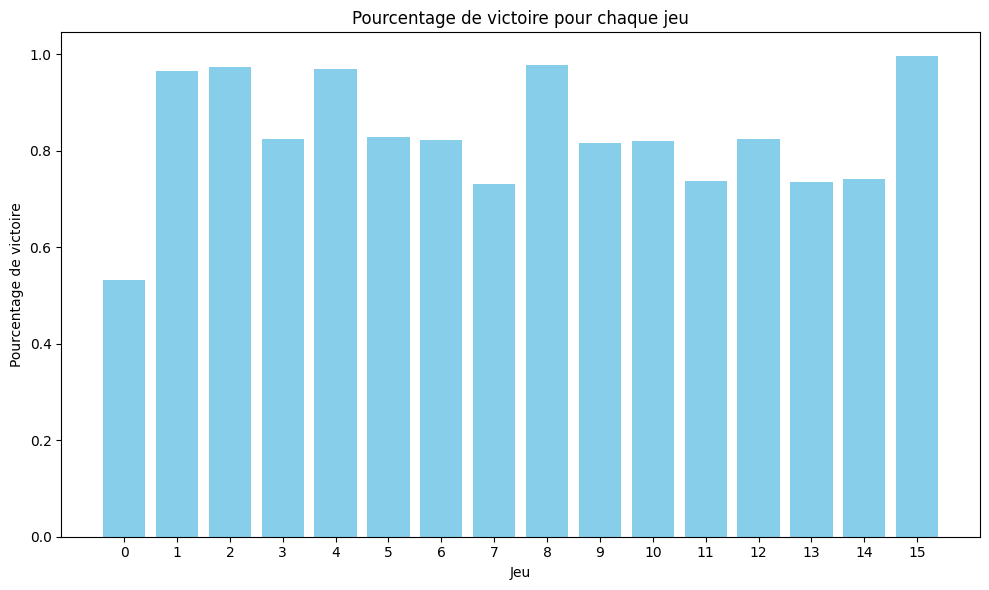

In [1]:
import matplotlib.pyplot as plt

# Données
games = list(range(16))
win_percentages = [
    0.5327310720981792, 0.9647329332981301, 0.9741633829949384, 0.8255747789757241,
    0.9703874699958288, 0.8290984146081405, 0.8226574011875434, 0.7316030532966699,
    0.9789390280618736, 0.8160885920052722, 0.8204495031007598, 0.7379501476260402,
    0.8236255515081513, 0.7361884498720893, 0.7411617161130375, 0.9960196455798317
]

# Création de l'histogramme
plt.figure(figsize=(10, 6))
plt.bar(games, win_percentages, color='skyblue')

# Ajout de labels et de titre
plt.xlabel('Jeu')
plt.ylabel('Pourcentage de victoire')
plt.title('Pourcentage de victoire pour chaque jeu')
plt.xticks(games)

# Affichage du graphique
plt.tight_layout()
plt.show()


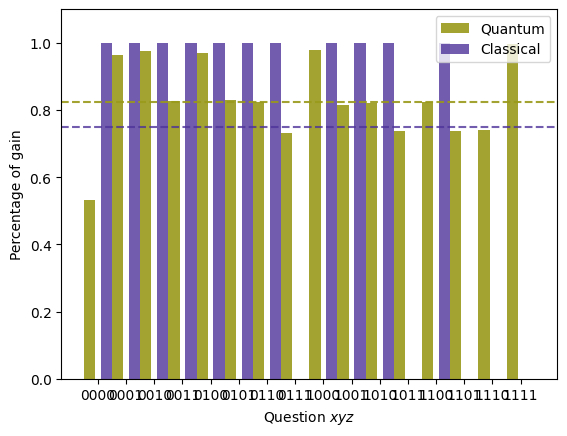

In [6]:
import matplotlib.pyplot as plt
import numpy as np 

probas_q = [
    0.5327310720981792, 0.9647329332981301, 0.9741633829949384, 0.8255747789757241,
    0.9703874699958288, 0.8290984146081405, 0.8226574011875434, 0.7316030532966699,
    0.9789390280618736, 0.8160885920052722, 0.8204495031007598, 0.7379501476260402,
    0.8236255515081513, 0.7361884498720893, 0.7411617161130375, 0.9960196455798317
]
gain_c = [
    1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0
]
x = ["0000", "0001", "0010", "0011", "0100", "0101", "0110", "0111", 
     "1000", "1001", "1010", "1011", "1100", "1101", "1110", "1111"]
x_axis = np.arange(len(x))

# An "interface" to matplotlib.axes.Axes.hist() method
plt.bar(x_axis - 0.3, probas_q, 0.4, color=(0.6, 0.6, 0.1, 0.9), label="Quantum")
plt.bar(x_axis + 0.3, gain_c, 0.4, color=(0.3, 0.2 , 0.6, 0.8), label = 'Classical')
plt.xticks(x_axis, x)
plt.ylim(0,1.1)
plt.xlabel('Question 'r'$xyz$')
plt.ylabel('Percentage of gain')

plt.axhline(y = 0.75, color = (0.3, 0.2 , 0.6, 0.8), linestyle = 'dashed')
plt.axhline(y = 0.822375, color = (0.6, 0.6, 0.1, 0.9), linestyle = 'dashed')
plt.legend()
#plt.text(2.5,0.91, r'$\mu=0.822375$')
plt.savefig('ghz_result.svg', format='svg', dpi=300)


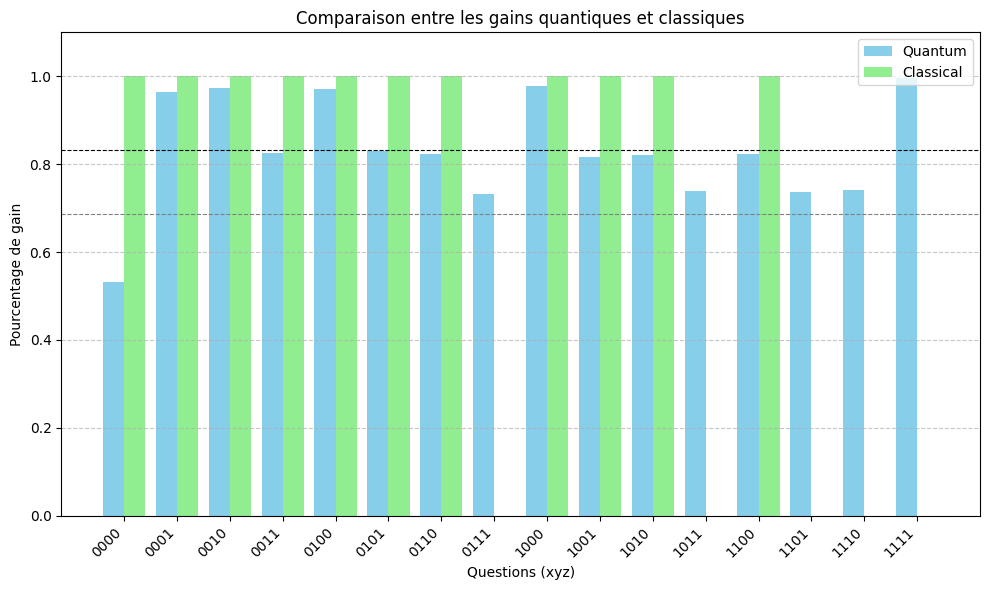

In [12]:
import matplotlib.pyplot as plt
import numpy as np 

probas_q = [
    0.5327310720981792, 0.9647329332981301, 0.9741633829949384, 0.8255747789757241,
    0.9703874699958288, 0.8290984146081405, 0.8226574011875434, 0.7316030532966699,
    0.9789390280618736, 0.8160885920052722, 0.8204495031007598, 0.7379501476260402,
    0.8236255515081513, 0.7361884498720893, 0.7411617161130375, 0.9960196455798317
]
gain_c = [
    1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0
]
x = ["0000", "0001", "0010", "0011", "0100", "0101", "0110", "0111", 
     "1000", "1001", "1010", "1011", "1100", "1101", "1110", "1111"]
x_axis = np.arange(len(x))

# Création de la figure
plt.figure(figsize=(10, 6))

# Barres pour les données quantiques
plt.bar(x_axis - 0.2, probas_q, 0.4, color='skyblue', label="Quantum")

# Barres pour les données classiques
plt.bar(x_axis + 0.2, gain_c, 0.4, color='lightgreen', label="Classical")

# Personnalisation des axes et du titre
plt.xticks(x_axis, x, rotation=45, ha='right')
plt.xlabel('Questions (xyz)')
plt.ylabel('Pourcentage de gain')
plt.title('Comparaison entre les gains quantiques et classiques')

# Légende
plt.legend()

# Lignes de référence
plt.axhline(y=0.6875, color='gray', linestyle='--', linewidth=0.8, label='Seuil de réussite classique')
plt.axhline(y=0.8313356962701381, color='black', linestyle='--', linewidth=0.8, label='Moyenne des gains quantiques')

# Limite de l'axe y
plt.ylim(0, 1.1)

# Affichage de la grille
plt.grid(axis='y', linestyle='--', alpha=0.7)

#plt.legend()

# Affichage du graphique
plt.tight_layout()
plt.show()


In [4]:

# Creating registers

l=0
i=0

for w in range(2):
    for x in range(2):
        for y in range(2):
            for z in range(2):
                

               
                 
                def valueref(w,x,y,z):
                    temp = (w * x * y) + (w * x * z) + (w * y * z) + (x * y * z)
                    if (temp > 0):
                        return 1
                    return 0

                p=0
                
                a=0
                b=0
                c=0
                d=0

                eq=a^b^c^d

                if eq==valueref(w,x,y,z):
                    p+=1
                print('Game',i,'percentage of win =', p)
                i=i+1
                l=l+p

print(l/16)

Game 0 percentage of win = 1
Game 1 percentage of win = 1
Game 2 percentage of win = 1
Game 3 percentage of win = 1
Game 4 percentage of win = 1
Game 5 percentage of win = 1
Game 6 percentage of win = 1
Game 7 percentage of win = 0
Game 8 percentage of win = 1
Game 9 percentage of win = 1
Game 10 percentage of win = 1
Game 11 percentage of win = 0
Game 12 percentage of win = 1
Game 13 percentage of win = 0
Game 14 percentage of win = 0
Game 15 percentage of win = 0
0.6875


In [11]:
from datetime import datetime

t = datetime(day=29, month=4, year=2024, hour=8)

backend=service.backend("ibm_kyoto")
a = backend.properties(datetime=t)

In [12]:
a.to_dict()

{'backend_name': 'ibm_kyoto',
 'backend_version': '1.2.38',
 'last_update_date': datetime.datetime(2024, 4, 29, 7, 24, 54, tzinfo=tzlocal()),
 'qubits': [[{'date': datetime.datetime(2024, 4, 28, 7, 48, 55, tzinfo=tzlocal()),
    'name': 'T1',
    'unit': 'us',
    'value': 162.1839940677455},
   {'date': datetime.datetime(2024, 4, 28, 7, 57, 50, tzinfo=tzlocal()),
    'name': 'T2',
    'unit': 'us',
    'value': 24.805144745669253},
   {'date': datetime.datetime(2024, 4, 29, 7, 24, 54, tzinfo=tzlocal()),
    'name': 'frequency',
    'unit': 'GHz',
    'value': 4.90831402409028},
   {'date': datetime.datetime(2024, 4, 29, 7, 24, 54, tzinfo=tzlocal()),
    'name': 'anharmonicity',
    'unit': 'GHz',
    'value': -0.30802879619250306},
   {'date': datetime.datetime(2024, 4, 28, 7, 32, 22, tzinfo=tzlocal()),
    'name': 'readout_error',
    'unit': '',
    'value': 0.21140000000000003},
   {'date': datetime.datetime(2024, 4, 28, 7, 32, 22, tzinfo=tzlocal()),
    'name': 'prob_meas0_prep1',